In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics






In [25]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("C:/Users/goreg/Desktop/Datasets/diabetes.csv", header=0, names=col_names)
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [13]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [14]:
logreg = LogisticRegression(random_state=16, max_iter=500)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=500, random_state=16)

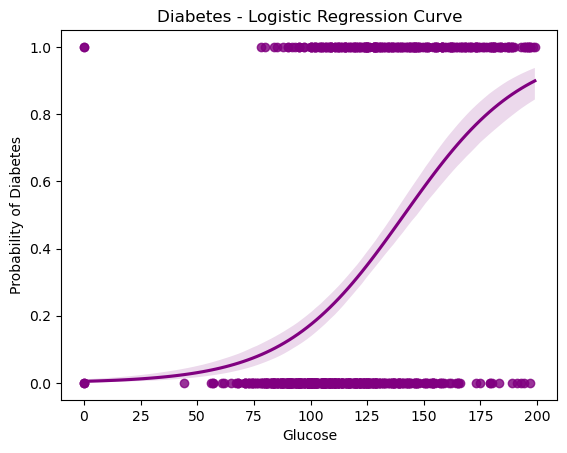

In [16]:
sns.regplot(x='glucose', y='label', data=pima, logistic=True, color='purple')
plt.title('Diabetes - Logistic Regression Curve')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.show()


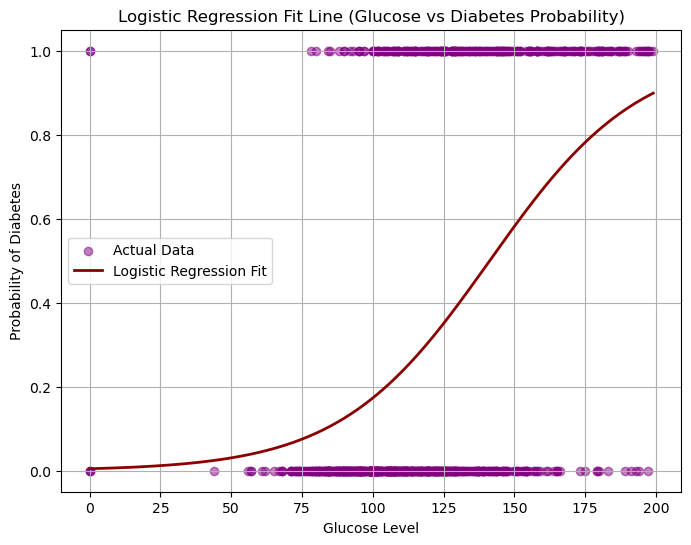

In [26]:
import numpy as np

from sklearn.linear_model import LogisticRegression

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("C:/Users/goreg/Desktop/Datasets/diabetes.csv", header=0, names=col_names)

X = df[['glucose']].values
y = df['label'].values

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='purple', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_prob, color='darkred', linewidth=2, label='Logistic Regression Fit')

plt.title('Logistic Regression Fit Line (Glucose vs Diabetes Probability)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()



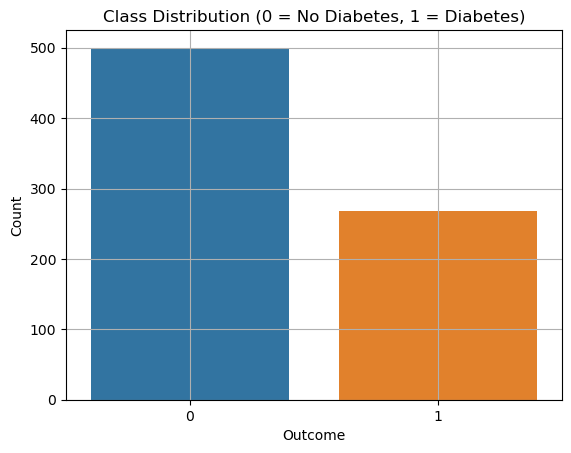

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()


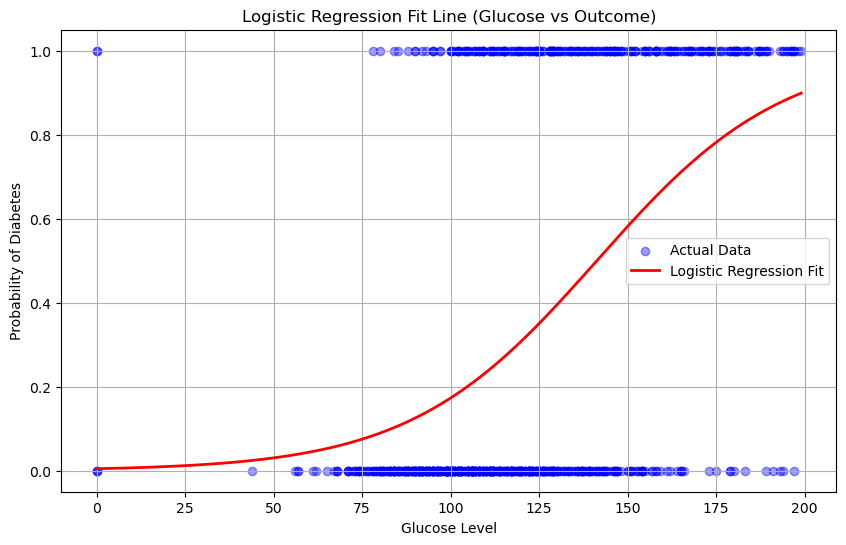

In [32]:
from sklearn.linear_model import LogisticRegression

# Train a new model on glucose only
X_glucose = df[['glucose']].values
y_label = df['label'].values

logreg_glucose = LogisticRegression()
logreg_glucose.fit(X_glucose, y_label)

# Generate glucose range and predict
glucose_range = np.linspace(X_glucose.min(), X_glucose.max(), 300).reshape(-1, 1)
y_prob = logreg_glucose.predict_proba(glucose_range)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_glucose, y_label, color='blue', alpha=0.4, label='Actual Data')
plt.plot(glucose_range, y_prob, color='red', linewidth=2, label='Logistic Regression Fit')
plt.title('Logistic Regression Fit Line (Glucose vs Outcome)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg = LogisticRegression(random_state=16, max_iter=500)
logreg.fit(X_train, y_train)

# Example input: [pregnant, insulin, bmi, age, glucose, bp, pedigree]
sample = [[2, 125, 30.5, 45, 180, 70, 0.5]]  # shape: (1, 7)

# Scale the input using the same scaler used for training
sample_scaled = scaler.transform(sample)

# Predict
y_pred = logreg.predict(sample_scaled)
print("Predicted label:", y_pred[0])


Predicted label: 0


C:\Users\goreg\anaconda3\gayatrigore1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\goreg\anaconda3\gayatrigore1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
# Predict on the entire test set
y_pred = logreg.predict(X_test_scaled)

# Now compute the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[125   0]
 [ 67   0]]


C:\Users\goreg\anaconda3\gayatrigore1\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


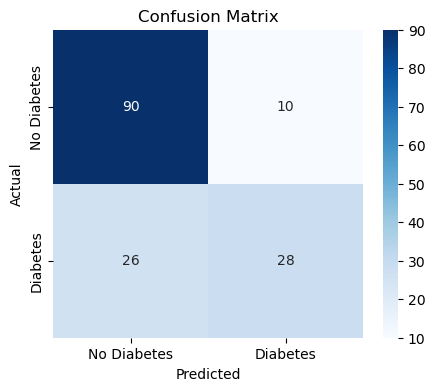

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define confusion matrix manually
cm = np.array([[90, 10],
               [26, 28]])

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [39]:
# Extract values
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
specificity = TN / (TN + FP) if (TN + FP) != 0 else 0

# Print results
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1 Score    : {f1_score:.4f}")
print(f"Specificity : {specificity:.4f}")

Accuracy    : 0.7662
Precision   : 0.7368
Recall      : 0.5185
F1 Score    : 0.6087
Specificity : 0.9000
